### Diplomado de Inteligencia Artificial - Universidad Virtual Anáhuac
### CNN para la detección de neumonía

### Objetivo: Que los alumnos conozcan el entorno de Colab y como se puede
### utilizar para entrenar un modelo de inteligencia artificial



In [ ]:
# Accediendo a Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Descargamos el dataset desde AWS
!wget "https://dataset-mlproduccion.s3.us-west-1.amazonaws.com/dogs-vs-cats.zip"

Mounted at /content/drive


In [ ]:
# Copiamos los archivos de Drive al entorno de Colab
!cp "/content/drive/My Drive/Datasets/Neumonia_Dataset.zip" "Neumonia_Dataset.zip"
!unzip -uq "Neumonia_Dataset.zip"

# Se descomprime el dataset

In [ ]:
# Bibliotecas a emplear
import os
import cv2
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [ ]:
# Definir las rutas donde estan las imagenes
train_folder= '/content/Neumonia_Dataset/train'
val_folder = '/content/Neumonia_Dataset/val'
test_folder = '/content/Neumonia_Dataset/test'

In [ ]:
# Se toman 4 imagenes de forma aleatoria
os.listdir(train_folder)
train_sanas = train_folder+'/NORMAL/'
train_neum = train_folder+'/PNEUMONIA/'
img_sanas = []
img_neumonia = []
for i in range(4):
    num_alea = np.random.randint(len(os.listdir(train_sanas)))
    img_sanas.append(train_sanas + os.listdir(train_sanas)[num_alea])
    img_neumonia.append(train_neum + os.listdir(train_neum)[num_alea])

Primer fila: personas sin neumonía
Segunda fila: personas con neumonía


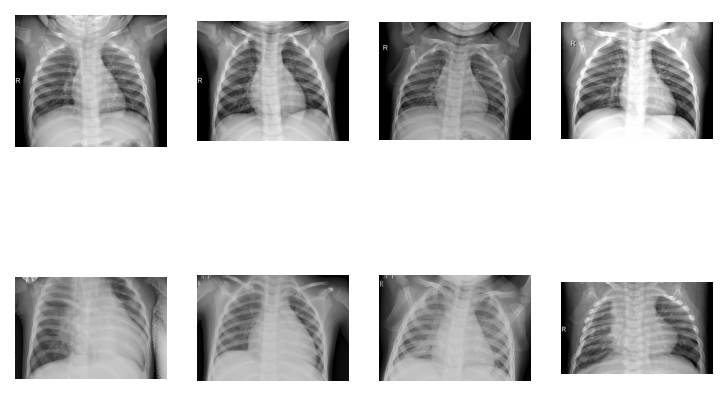

In [ ]:
# Se muestran radiografías de personas con y sin neumonía
print('Primer fila: personas sin neumonía')
print('Segunda fila: personas con neumonía')
plt.rcParams['figure.dpi'] = 150
for num_imagen in range(8):
    if num_imagen<4:
        imagen = cv2.imread(img_sanas[num_imagen])
    else:
        imagen = cv2.imread(img_neumonia[num_imagen-4])
    plt.subplot(2,4,num_imagen+1)
    plt.imshow(imagen)
    plt.axis('off')
plt.show()

In [ ]:
# Red neuronal convolucional
cnn = models.Sequential()

# Capas convolucionales y de pooling
cnn.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
cnn.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation="relu"))
cnn.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation="relu"))
cnn.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn.add(layers.Flatten())

# Capas densamente conectadas
cnn.add(layers.Dense(activation = 'relu', units = 128))
cnn.add(layers.Dense(activation = 'sigmoid', units = 1))

# Compilar el modelo neuronal
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Detalle de la red neuronal convolucional
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [ ]:
# Preprocesamiento de las imagenes
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# Normalización de imagenes
test_datagen = ImageDataGenerator(rescale = 1./255)

# Generación de los conjuntos de entrenamiento, validación y prrueba
training_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size = (150, 150),
                                                 batch_size = 20,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(val_folder,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = (150, 150),
                                            batch_size = 20,
                                            class_mode = 'binary')

Found 3512 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.


In [ ]:
cnn_model = cnn.fit(training_set,
                    steps_per_epoch=100,
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 83s 391ms/step - loss: 0.5497 - accuracy: 0.7403 - val_loss: 0.1825 - val_accuracy: 0.9290
Epoch 2/100
100/100 [==============================] - 38s 385ms/step - loss: 0.3294 - accuracy: 0.8728 - val_loss: 0.1327 - val_accuracy: 0.9590
Epoch 3/100
100/100 [==============================] - 37s 373ms/step - loss: 0.2695 - accuracy: 0.8965 - val_loss: 0.1362 - val_accuracy: 0.9530
Epoch 4/100
100/100 [==============================] - 38s 381ms/step - loss: 0.2031 - accuracy: 0.9159 - val_loss: 0.1630 - val_accuracy: 0.9410
Epoch 5/100
100/100 [==============================] - 37s 373ms/step - loss: 0.2653 - accuracy: 0.8954 - val_loss: 0.1630 - val_accuracy: 0.9390
Epoch 6/100
100/100 [==============================] - 37s 367ms/step - loss: 0.2079 - accuracy: 0.9234 - val_loss: 0.1368 - val_accuracy: 0.9500
Epoch 7/100
100/100 [==============================] - 39s 387ms/step - loss: 0.2182 - accuracy: 0.9114 - val_loss: 0.1209 -

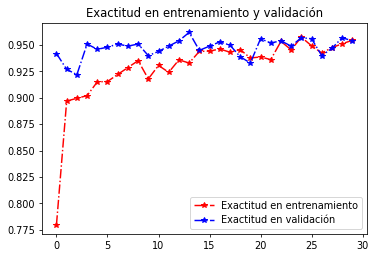

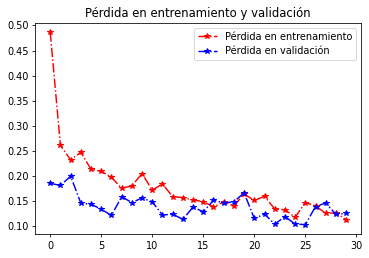

In [ ]:
# Graficas de la presición y función de perdida

acc = cnn_model.history['accuracy']
val_acc = cnn_model.history['val_accuracy']
loss = cnn_model.history['loss']
val_loss = cnn_model.history['val_loss']

epochs = range(len(acc))

plt.rcParams['figure.dpi'] = 70
plt.plot(epochs, acc, '-.r*', label='Exactitud en entrenamiento')
plt.plot(epochs, val_acc, '-.b*', label='Exactitud en validación')
plt.title('Exactitud en entrenamiento y validación')
plt.legend()
plt.figure()

plt.plot(epochs, loss, '-.r*', label='Pérdida en entrenamiento')
plt.plot(epochs, val_loss, '-.b*', label='Pérdida en validación')
plt.title('Pérdida en entrenamiento y validación')
plt.legend()

plt.show()

In [ ]:
test_accu = cnn.evaluate(test_set,steps=50)

50/50 [==============================] - 8s 162ms/step - loss: 0.3005 - accuracy: 0.9090


In [ ]:
print('La exactitud en el conjunto de prueba es: ',test_accu[1]*100, '%')

La exactitud en el conjunto de prueba es:  90.89999794960022 %


Persona con neumonia


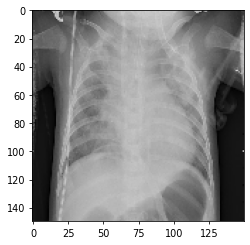

In [ ]:
# Predicción sobre una imagen de prueba

#img_ori = cv2.imread('/content/Neumonia_Dataset/test/NORMAL/IM-0001-0001.jpeg')
img_ori = cv2.imread('/content/Neumonia_Dataset/test/PNEUMONIA/person119_bacteria_566.jpeg')

img_ori = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)
img = cv2.resize(img_ori, (150, 150), interpolation=cv2.INTER_CUBIC)
imagen_a_probar = np.reshape(img,(1,150, 150, 3))
predictions = cnn.predict(imagen_a_probar)
if(predictions == 0):
  print('Persona sin neumonia')
else:
  print('Persona con neumonia')
plt.imshow(img)
plt.show()

In [ ]:
# Red Neuronal Prefedinida